[*********************100%%**********************]  1 of 1 completed


Last Row of Pivot Data for NQ=F:
High           19155.00
Low            18940.00
Close          19037.75
Open           19064.00
R3             19363.50
R2             19259.25
R1             19148.50
Pivot_Point    19044.25
S1             18933.50
S2             18829.25
S3             18718.50
Name: 2024-06-07 00:00:00, dtype: float64



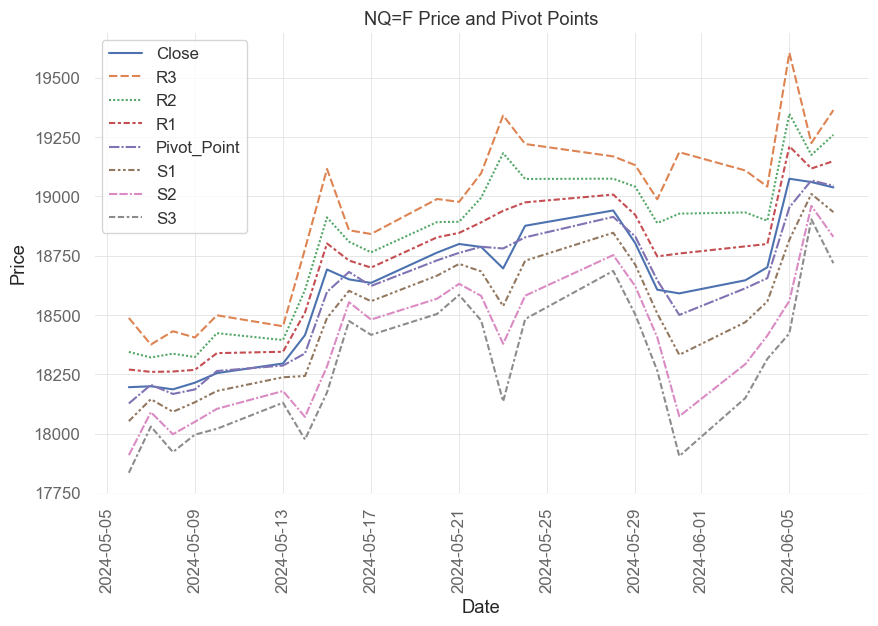

HTML file saved successfully: c:\Users\Wolfrank\Desktop\WebWorx\WolfRSSfeed\WolfRSSfeed\NQ=F_pivot_points.html
HTML file saved successfully: c:\Users\Wolfrank\Desktop\WebWorx\WolfRSSfeed\WolfRSSfeed\index.html
Error during git operations: Command '['git', 'push', 'origin', 'main']' returned non-zero exit status 1.
Failed to publish file to GitHub: c:\Users\Wolfrank\Desktop\WebWorx\WolfRSSfeed\WolfRSSfeed\index.html


In [32]:
#pivots

import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import requests 


# Get user input for the stock ticker
ticker = 'NQ=F'

# Download data for the last 30 days with daily intervals
ndata = yf.download(ticker, period="30d", interval="1d")

# Extract high, low, close, and open prices and round them to 2 decimal places
high = ndata['High'].round(2)
low = ndata['Low'].round(2)
close = ndata['Close'].round(2)
open_price = ndata['Open'].round(2)

# Calculate the pivot point and support/resistance levels
pivot_point = (high + low + close) / 3
support1 = (2 * pivot_point) - high
support2 = pivot_point - (high - low)
support3 = low - 2 * (high - pivot_point)
resistance1 = (2 * pivot_point) - low
resistance2 = pivot_point + (high - low)
resistance3 = high + 2 * (pivot_point - low)

# Create a DataFrame with the calculated values
pivot_data = pd.DataFrame({
    'High': high,
    'Low': low,
    'Close': close,
    'Open': open_price,
    'R3': resistance3,
    'R2': resistance2,
    'R1': resistance1,
    'Pivot_Point': pivot_point,
    'S1': support1,
    'S2': support2,
    'S3': support3,
}).round(2)

# Exclude the last row for plotting
df_except_last_row = pivot_data.iloc[:-1]

# Print the last row of pivot data
print(f"Last Row of Pivot Data for {ticker}:")
print(df_except_last_row.iloc[-1])
print()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_except_last_row[['Close', 'R3', 'R2', 'R1', 'Pivot_Point', 'S1', 'S2', 'S3']])
plt.title(f'{ticker} Price and Pivot Points')
plt.xlabel('Date')
plt.ylabel('Price')

# Rotate y-axis labels by 90 degrees
plt.xticks(rotation=90)

# Save the plot image
plot_filename = f"{ticker}_pivot_plot.png"
plt.savefig(plot_filename, bbox_inches='tight')

# Display the plot
plt.show()

# HTML generation (embedded with the results)
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
  
    <title>{ticker} Pivot Points</title>
</head>
<style>
body 
</style>
<body>
    <h1>{ticker} Pivot Points</h1>
    
    <h2>Latest NQ Floor Pivot Data</h2>
    <pre>{df_except_last_row.iloc[-1]}</pre>
    
    <h2>Plot</h2>
    <img src="{plot_filename}" alt="{ticker} Pivot Plot" width="800">
</body>
</html>
"""

# Define the file path to save the HTML file
file_path = os.path.join(os.getcwd(), f"{ticker}_pivot_points.html")

# Save the HTML content to a file
with open(file_path, 'w', encoding='utf-8') as f:
    f.write(html_content)

# Print the path where the HTML file was saved
print(f"HTML file saved successfully: {file_path}")

import yfinance as yf
import quantstats as qs
import pandas as pd
import requests
from xml.etree import ElementTree as ET
import random
import os
import time
import subprocess

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Function to fetch RSS feed content from a URL
def fetch_rss_feed(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching RSS feed: {url} - {e}")
        return None

# Function to parse RSS feed data
def parse_rss_feed(xml_data):
    if not xml_data:
        return []

    try:
        root = ET.fromstring(xml_data)
        items = []
        for index, item in enumerate(root.findall('.//item')):
            if index >= 3:
                break
            title = item.find('title').text if item.find('title') is not None else 'No title'
            link = item.find('link').text if item.find('link') is not None else '#'
            description = item.find('description').text if item.find('description') is not None else 'No description'
            pub_date = item.find('pubDate').text if item.find('pubDate') is not None else 'No date'
            media_content = item.find('{http://search.yahoo.com/mrss/}content')
            media_url = media_content.attrib['url'] if media_content is not None and 'url' in media_content.attrib else ''
            items.append({
                'title': title,
                'link': link,
                'description': description,
                'pub_date': pub_date,
                'media_url': media_url
            })
        return items[:3]  # Limit to 3 items per feed
    except ET.ParseError as e:
        print(f"Error parsing XML data: {e}")
        return []
    except Exception as ex:
        print(f"Error processing RSS feed data: {ex}")
        return []

# Function to generate HTML content with embedded CSS and feed item details
def generate_html(feed_urls, css_content):
    random.shuffle(feed_urls)  # Shuffle feed URLs for random order

    # Fetch QuantStat HTML report
    try:
        # Example: Fetch and save QuantStat report
        futures_symbol = "NQ=F"
        data = yf.Ticker(futures_symbol)
        futures_data = data.history(period="1y")
        
        # Calculate daily returns
        futures_data['Return'] = futures_data['Close'].pct_change()
        
        # Assume an initial investment of $10,000
        initial_investment = 100000
        futures_data['Balance'] = initial_investment * (1 + futures_data['Return']).cumprod()
        
        # Fill NaN values for the first row
        futures_data['Return'].iloc[0] = 0
        futures_data['Balance'].iloc[0] = initial_investment
        
        # Round numerical values
        futures_data['Balance'] = futures_data['Balance'].round(2)

        # Save data to CSV for QuantStat
        file_path = "NQ_futures_with_balance_and_return.csv"
        futures_data.to_csv(file_path)
        
        # Set the index to datetime for QuantStat
        returns = futures_data['Return']
        returns.index = pd.to_datetime(returns.index)
        
        # Generate QuantStat HTML report
        qs.reports.html(returns, output='NQ_futures_report.html')
        
    except Exception as e:
        print(f"Error generating QuantStat HTML report: {e}")
        return ""

    # Generate HTML content
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <style>
        {css_content}

        
        </style>
        <title>Wolfrank's Nasdaq Trading Tools + RSS Feed</title>
    </head>
    <body>
    
      
        <h1>Wolfrank's Nasdaq Trading Tools + RSS Feed</h1>
        
        
        
          <div class="feed-container"> 
        <h3>
   This site includes returns on the index, pivot points and other statistics along with a RSS feed. 
        </h3>
        </div>
           <div class="feed-container"> 
        <h2>Emini Nasdaq 100 Futures Index Returns<h2>
            <!-- Embed QuantStat & Pivot Points report -->
            <object type="text/html" data="NQ=F_pivot_points.html" width="100%" height="900"></object>
            <object type="text/html" data="NQ_futures_report.html" width="100%" height="1200"></object>
    """

    # Process RSS feeds
    for url in feed_urls:
        xml_data = fetch_rss_feed(url)
        if xml_data:
            feed_data = parse_rss_feed(xml_data)
            if feed_data:
                for item in feed_data:
                    # Ensure links open in a new tab
                    html_content += f"""
                    <div class="feed-item">
                        <h3><a href="{item['link']}" target="_blank">{item['title']}</a></h3>
                        <p>{item['description']}</p>
                        <span>{item['pub_date']}</span>
                        {'<br><img src="' + item['media_url'] + '" alt="Media content">' if item['media_url'] else ''}
                    </div>
                    """
            else:
                html_content += f"\n<p>No valid items found in RSS feed: {url}</p>"
        else:
            html_content += f"\n<p>Error fetching RSS feed: {url}</p>"

    # Close HTML structure
    html_content += """
        </div>
    </body>
    </html>
    """
    return html_content

# Function to save HTML content to a file
def save_html(html, filename="custom_rss_feed.html"):
    cwd = os.getcwd()
    file_path = os.path.join(cwd, filename)
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"HTML file saved successfully: {file_path}")
    return file_path

# Function to commit file to GitHub repository
def commit_and_push_to_github(file_path, commit_message):
    try:
        # Add the file to staging
        subprocess.run(["git", "add", file_path], check=True)
        # Commit the file
        subprocess.run(["git", "commit", "-m", commit_message], check=True)
        # Push the changes to the main branch
        subprocess.run(["git", "push", "origin", "main"], check=True)
        print("Changes committed and pushed to GitHub successfully.")
        return True
    except subprocess.CalledProcessError as e:
        print(f"Error during git operations: {e}")
        return False

# Main job function to generate RSS feed HTML and push to GitHub
def job():
    feed_urls = [
        "https://www.cnbc.com/id/100003114/device/rss/rss.html",
        "https://aws.amazon.com/blogs/aws/feed",
        "https://cr-news-api-service.prd.crunchyrollsvc.com/v1/en-US/rss",
        "https://ir.nasdaq.com/rss/news-releases.xml?items=15"
    ]

    css_content = """
    body {
        font-family: Arial, sans-serif;
        line-height: 1.6;
    }

    h1 {
        text-align: center;
    }

    .feed-container {
        width: 80%;
        margin: 0 auto;
    }

    .feed-item {
        border-bottom: 1px solid #ccc;
        padding: 10px 0;
    }

    .feed-item h3 a {
        text-decoration: none;
        color: #000;
    }
    """

    html = generate_html(feed_urls, css_content)
    filename = "index.html"
    file_path = save_html(html, filename)
    commit_message = f"Update RSS feed - {time.strftime('%Y-%m-%d %H:%M:%S')}"
    success = commit_and_push_to_github(file_path, commit_message)
    if success:
        print(f"File published successfully to GitHub: {file_path}")
    else:
        print(f"Failed to publish file to GitHub: {file_path}")

# Run the job
job()

